In [1]:
#XG Boost Regression
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, acf
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

df = pd.read_csv('/Users/jojolapatate/Documents/GitHub/The-Endless-Line/The-Endless-Line_jo/final_data_day.csv')
df_15 = pd.read_csv('/Users/jojolapatate/Downloads/final_data_15min.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jojolapatate/Documents/GitHub/The-Endless-Line/The-Endless-Line_jo/final_data_day.csv'

In [3]:
df_15['DATE'] = pd.to_datetime(df_15['DATE'])

# Filter rows where the year is greater than 2020
df_15_bis = df_15[df_15['DATE'].dt.year > 2020]
df_15_bis = df_15_bis[df_15_bis['ATTENDANCE'] > 0]
df_15_bis = df_15_bis[df_15_bis['GUEST CARRIED'] > 0]
df_15_bis.sort_values('DATE', inplace = True)
df_15_bis.drop(columns = ['START OF 1 RIDE FOR ATTRACTION','END OF 1 RIDE FOR ATTRACTION', 'ATTRACTION'], inplace = True)


In [7]:
df_15_bis

,DATE,HOUR START OF 1 RIDE,ATTRACTION NAME,WAIT TIME,NB UNITS,GUEST CARRIED,CAPACITY,ADJUST CAPACITY,OPEN_TIME,REAL TIME ATTRACTION OPEN FOR 15MIN,...,PRESSURE,HUMIDITY,WIND SPEED,WIND DEG,CLOUD PERCENTAGE,WEATHER MAIN,ATTENDANCE,IS NIGHT SHOW,IS PARADE 1,IS PARADE 2
1764040,2021-06-15,9,Giant Wheel,5,2.0,148.0000,503.75,201.50,15,15,...,1017.159478,83.524512,4.237857,185.22542,70.637711,70.637711,4659.0,0.0,0.0,0.0
1764635,2021-06-15,15,Merry Go Round,20,127.0,147.0000,484.00,472.75,15,15,...,1017.159478,83.524512,4.237857,185.22542,70.637711,70.637711,4659.0,0.0,0.0,0.0
1764637,2021-06-15,15,Inverted Coaster,20,1.0,40.0005,355.25,177.50,15,15,...,1017.159478,83.524512,4.237857,185.22542,70.637711,70.637711,4659.0,0.0,0.0,0.0
1764638,2021-06-15,15,Bungee Jump,5,4.0,94.0000,306.75,245.25,15,15,...,1017.159478,83.524512,4.237857,185.22542,70.637711,70.637711,4659.0,0.0,0.0,0.0
1764639,2021-06-15,15,Superman Ride,15,3.0,19.0000,243.75,65.00,15,4,...,1017.159478,83.524512,4.237857,185.22542,70.637711,70.637711,4659.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335344,2022-07-26,13,Oz Theatre,0,2.0,24.0000,387.50,387.50,15,15,...,1017.159478,83.524512,4.237857,185.22542,70.637711,70.637711,26391.0,0.0,0.0,0.0
2335345,2022-07-26,13,Superman Ride,15,3.0,198.0000,243.75,243.75,15,15,...,1017.159478,83.524512,4.237857,185.22542,70.637711,70.637711,26391.0,0.0,0.0,0.0
2335346,2022-07-26,13,Kiddie Coaster,10,18.0,216.0000,411.75,411.75,15,15,...,1017.159478,83.524512,4.237857,185.22542,70.637711,70.637711,26391.0,0.0,0.0,0.0
2335348,2022-07-26,13,Go-Karts,40,4.0,228.0000,450.50,450.50,15,15,...,1017.159478,83.524512,4.237857,185.22542,70.637711,70.637711,26391.0,0.0,0.0,0.0


In [4]:
dizzy = df_15_bis[df_15_bis['ATTRACTION NAME'] == 'Dizzy Dropper']
dizzy = dizzy.groupby('DATE').mean()

/var/folders/bv/5s8wgnqx04n66t4k9rrp0ygh0000gn/T/ipykernel_96981/2095496172.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dizzy = dizzy.groupby('DATE').mean()


18:59:25 - cmdstanpy - INFO - Chain [1] start processing
18:59:25 - cmdstanpy - INFO - Chain [1] done processing


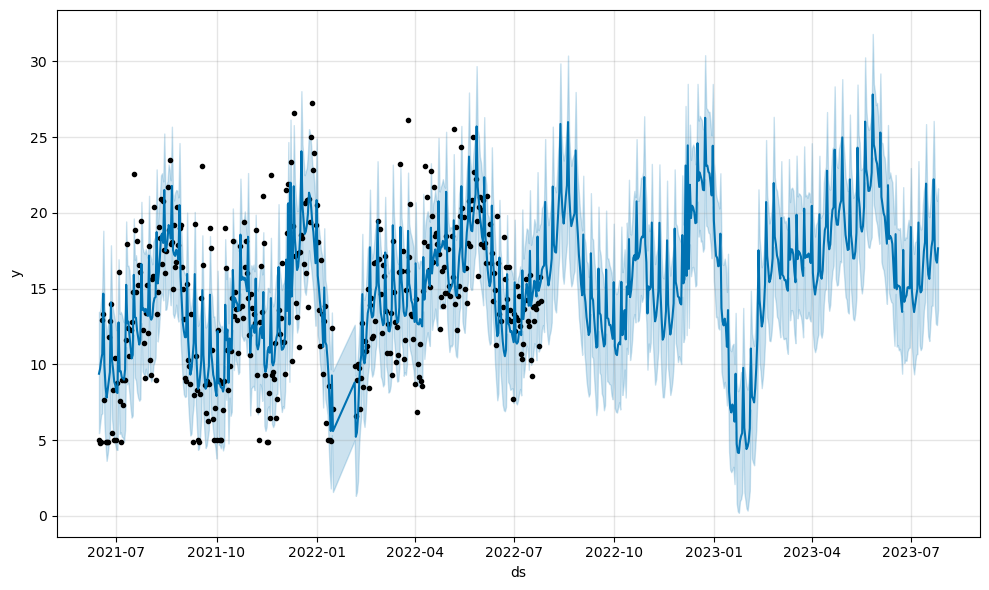

In [5]:
from prophet import Prophet

# Assuming your DataFrame is named 'df'

# Format the DataFrame for Prophet
df_prophet = dizzy.reset_index().rename(columns={'DATE': 'ds', 'WAIT TIME': 'y'})



# Initialize the Prophet model
model = Prophet(weekly_seasonality = True, daily_seasonality= True, yearly_seasonality= True)

# Add built-in seasonality
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
# Add custom seasonality (e.g., for business cycles or other known periodic events)

model.add_country_holidays(country_name='ES')

# Fit the model with your dataframe
model.fit(df_prophet)

# Create a DataFrame for future dates for which predictions are needed
future_dates = model.make_future_dataframe(periods=365)  # Adjust periods as needed

# Ensure future_dates includes future values for additional regressors!
# You'll need to add them to future_dates before making predictions.

# Predict future WAIT TIME
forecast = model.predict(future_dates)

# Plot the results
fig1 = model.plot(forecast)


In [33]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Assuming df_15_bis is your DataFrame
available_attractions = df_15_bis['ATTRACTION NAME'].unique()

app = dash.Dash(__name__)

# Set a white background and use external CSS for better styling
app.css.append_css({"external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"})

app.layout = html.Div([
    html.H1("Attraction Wait Time Prediction", style={'textAlign': 'center'}),
    html.Div([
        dcc.Dropdown(
            id='attraction-dropdown',
            options=[{'label': i, 'value': i} for i in available_attractions],
            value='Dizzy Dropper',  # Set a default value
            style={'width': '50%', 'display': 'inline-block'}
        ),
        dcc.DatePickerRange(
            id='date-picker-range',
            start_date=df_15_bis['DATE'].min(),
            end_date=df_15_bis['DATE'].max(),
            display_format='YYYY-MM-DD',
            style={'display': 'inline-block'}
        )
    ], style={'textAlign': 'center', 'backgroundColor': 'white'}),
    dcc.Graph(id='prediction-plot'),
    html.Div(id='mse-output', style={'textAlign': 'center', 'fontSize': 20, 'backgroundColor': 'white'})
], style={'width': '80%', 'margin-left': 'auto', 'margin-right': 'auto', 'backgroundColor': 'white'})

@app.callback(
    [Output('prediction-plot', 'figure'),
     Output('mse-output', 'children')],
    [Input('attraction-dropdown', 'value'),  # Écoute les changements de valeur dans le dropdown
     Input('date-picker-range', 'start_date'),  # Écoute les changements de la date de début
     Input('date-picker-range', 'end_date')]  # Écoute les changements de la date de fin
)
def update_output(selected_attraction, start_date, end_date):
    # Filter the dataset for the selected attraction and date range
    filtered_df = df[(df['ATTRACTION NAME'] == selected_attraction) & 
                     (df['DATE'] >= start_date) & 
                     (df['DATE'] <= end_date)]

    # Assuming 'DATE' is the index
    filtered_df = filtered_df.reset_index().rename(columns={'DATE': 'ds', 'WAIT TIME': 'y'})

    # Initialize and fit the Prophet model
    model = Prophet(weekly_seasonality=True, daily_seasonality=True, yearly_seasonality=True)
    model.fit(filtered_df)

    # Make future predictions; you might need to adjust this part based on your actual date range
    future_dates = model.make_future_dataframe(periods=365)
    forecast = model.predict(future_dates)

    # Assuming you have actual values to compare against in `filtered_df`
    # This is a simplification; you'll likely need to adjust the test set creation
    actuals = filtered_df['y'][-90:]  # This assumes you have actual values for the last year
    predictions = forecast['yhat'][-90:]
    
    # Calculate MSE
    mse = mean_squared_error(actuals, predictions)

    # Prepare the plotly figure
    figure = {
        'data': [
            {'x': forecast['ds'], 'y': forecast['yhat'], 'type': 'line', 'name': 'Predicted'},
            {'x': filtered_df['ds'], 'y': filtered_df['y'], 'type': 'line', 'name': 'Actual'},
        ],
        'layout': {
            'title': 'Predictions vs Actuals',
            'xaxis': {'title': 'Date'},
            'yaxis': {'title': 'WAIT TIME'},
        }
    }

    # Return the figure and MSE text
    return figure, f'MSE: {mse}'

if __name__ == '__main__':
    app.run_server(debug=True)


/Users/jojolapatate/anaconda3/lib/python3.11/site-packages/dash/resources.py:61: UserWarning:

You have set your config to `serve_locally=True` but A local version of https://codepen.io/chriddyp/pen/bWLwgP.css is not available.
If you added this file with `app.scripts.append_script` or `app.css.append_css`, use `external_scripts` or `external_stylesheets` instead.
See https://dash.plotly.com/external-resources



19:40:46 - cmdstanpy - INFO - Chain [1] start processing
19:40:46 - cmdstanpy - INFO - Chain [1] done processing
19:40:50 - cmdstanpy - INFO - Chain [1] start processing
19:40:50 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming df_15_bis is your DataFrame
available_attractions = df_15_bis['ATTRACTION NAME'].unique()

app = dash.Dash(__name__)

# External CSS for better styling
app.css.append_css({"external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"})

app.layout = html.Div([
    html.H1("Attraction Wait Time Prediction", style={'textAlign': 'center'}),
    html.Div([
        dcc.Dropdown(
            id='attraction-dropdown',
            options=[{'label': i, 'value': i} for i in available_attractions],
            value='Dizzy Dropper',  # Default value
            style={'width': '50%', 'display': 'inline-block'}
        ),
        dcc.DatePickerRange(
            id='date-picker-range',
            start_date=df_15_bis['DATE'].min(),
            end_date=df_15_bis['DATE'].max(),
            display_format='YYYY-MM-DD',
            style={'display': 'inline-block'}
        )
    ], style={'textAlign': 'center', 'backgroundColor': 'white'}),
    dcc.Graph(id='prediction-plot'),
    dcc.Graph(id='heatmap-plot'),  # ADDITION: New Graph for heatmap
    html.Div(id='mse-output', style={'textAlign': 'center', 'fontSize': 20, 'backgroundColor': 'white'})
], style={'width': '80%', 'margin-left': 'auto', 'margin-right': 'auto', 'backgroundColor': 'white'})

@app.callback(
    [Output('prediction-plot', 'figure'),
     Output('heatmap-plot', 'figure'),
     Output('mse-output', 'children')],
    [Input('attraction-dropdown', 'value'),
     Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_output(selected_attraction, start_date, end_date):
    # Filter the dataset for the selected attraction and date range
    filtered_df = df_15_bis[(df_15_bis['ATTRACTION NAME'] == selected_attraction) & 
                            (df_15_bis['DATE'] >= start_date) & 
                            (df_15_bis['DATE'] <= end_date)]
                            
    # Convert 'DATE' to datetime, if not already
    filtered_df['DATE'] = pd.to_datetime(filtered_df['DATE'])
    
    # Preparing data for Prophet
    prophet_df = filtered_df[['DATE', 'WAIT TIME']].rename(columns={'DATE': 'ds', 'WAIT TIME': 'y'})

    # Initialize and fit the Prophet model
    model = Prophet(weekly_seasonality=True, daily_seasonality=True, yearly_seasonality=True)
    model.fit(prophet_df)

    # Make future predictions; you might need to adjust this part based on your actual date range
    future_dates = model.make_future_dataframe(periods=365)
    forecast = model.predict(future_dates)

    # Prepare the plotly figure for predictions
    prediction_fig = go.Figure()
    prediction_fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Predicted'))
    prediction_fig.add_trace(go.Scatter(x=prophet_df['ds'], y=prophet_df['y'], mode='lines', name='Actual'))
    prediction_fig.update_layout(title='Predictions vs Actuals', xaxis_title='Date', yaxis_title='Wait Time')

    # Heatmap Data Preparation
    filtered_df['day_of_week'] = filtered_df['DATE'].dt.dayofweek
    filtered_df['day_of_week'] =  filtered_df['day_of_week'].sort_values()
    filtered_df['day_of_week'] = filtered_df['day_of_week'].replace({0:'Monday', 
                                                                     1: 'Tuesday', 
                                                                     2: 'Wednesday', 
                                                                     3: 'Thurday', 
                                                                     4: 'Friday', 
                                                                     5: 'Saturday', 
                                                                     6: 'Sunday'})
    heatmap_df = filtered_df.pivot_table(index='day_of_week', columns='HOUR START OF 1 RIDE', values='WAIT TIME', aggfunc=np.mean)
    heatmap_fig = px.imshow(heatmap_df, labels=dict(x="Hour of Start", y="Day of Week", color="Average Wait Time"),
                            aspect="auto", color_continuous_scale='Viridis')
    heatmap_fig.update_layout(title='Average Wait Time Heatmap')

    # Placeholder for MSE calculation
    mse_text = "MSE calculation placeholder"  # Adjust this to calculate MSE if needed

    return prediction_fig, heatmap_fig, mse_text


if __name__ == '__main__':
    app.run_server(debug=True)


/Users/jojolapatate/anaconda3/lib/python3.11/site-packages/dash/resources.py:61: UserWarning:

You have set your config to `serve_locally=True` but A local version of https://codepen.io/chriddyp/pen/bWLwgP.css is not available.
If you added this file with `app.scripts.append_script` or `app.css.append_css`, use `external_scripts` or `external_stylesheets` instead.
See https://dash.plotly.com/external-resources



/var/folders/bv/5s8wgnqx04n66t4k9rrp0ygh0000gn/T/ipykernel_96981/2985400923.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

19:51:00 - cmdstanpy - INFO - Chain [1] start processing
/var/folders/bv/5s8wgnqx04n66t4k9rrp0ygh0000gn/T/ipykernel_96981/2985400923.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

19:51:03 - cmdstanpy - INFO - Chain [1] start processing
19:51:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/bv/5s8wgnqx04n66t4k9rrp0ygh0000gn/T/ipykernel_96981/2985400923.py:76: S